In [1]:
import pandas as pd
import numpy as np

In [2]:
def infer(val):
    if (val<0.05):
        print(f"We reject the null hypothesis(H0) and accept the alternate hypothesis(H1)")
    else:
        print(f"We reject the alternate hypothesis(H1) and accept the null hypothesis(H0)")

In [3]:
df = pd.read_excel('retail.xlsx', sheet_name=3)
print(df.head())

   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)   
0           1    Male   19              15000                      39  \
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6  


In [4]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


**The dataset contains information on 2000 customers including their age, annual income, spending score, work experience, and family size. The average age of the customers is approximately 49 years, with a standard deviation of 28. The average annual income is $110,732 with a standard deviation of $45,740. The average spending score is around 51 out of 100, with a standard deviation of approximately 28. The average work experience is around 4 years, with a standard deviation of almost 4 years. The average family size is around 4 people, with a standard deviation of almost 2 people.**

**The range of values for each feature varies widely, with the youngest customer being 0 years old and the oldest being 99 years old. The annual income ranges from $0 to $189,974, while the spending score ranges from 0 to 100. The work experience ranges from 0 to 17 years, and the family size ranges from 1 to 9 people.**

In [5]:
for i in df.columns:
    print(i)

CustomerID
Gender
Age
Annual Income ($)
Spending Score (1-100)
Profession
Work Experience
Family Size


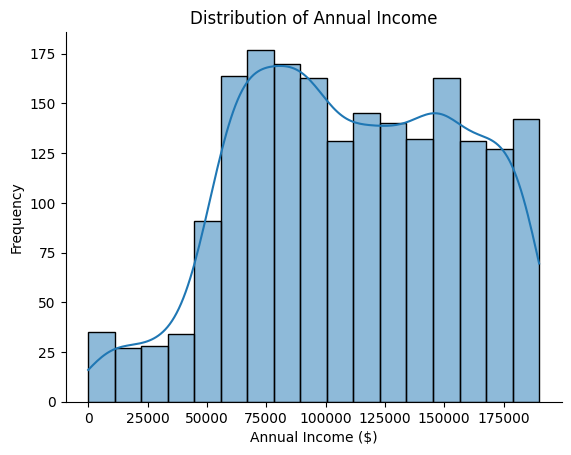

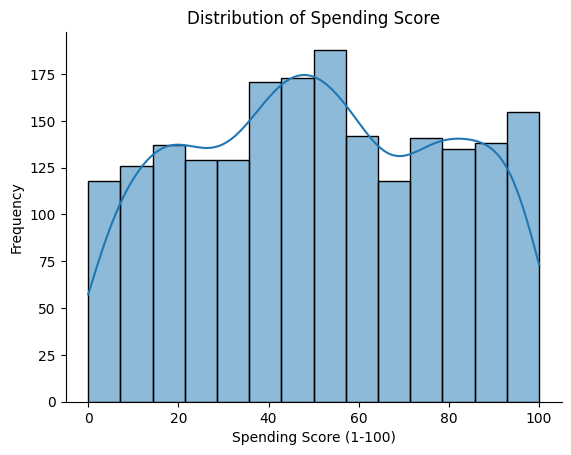

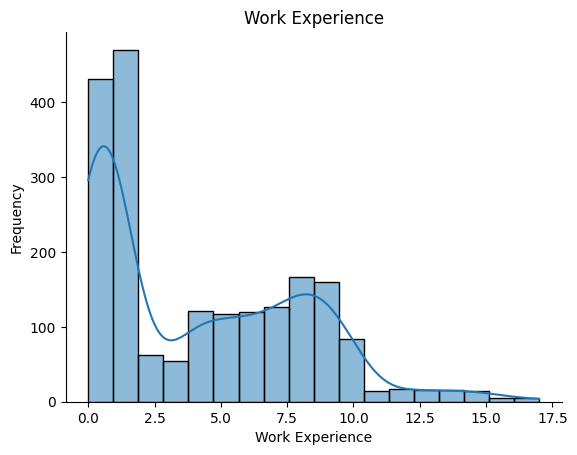

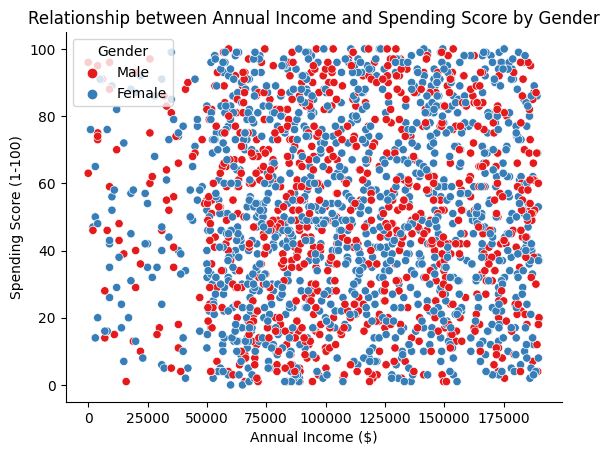

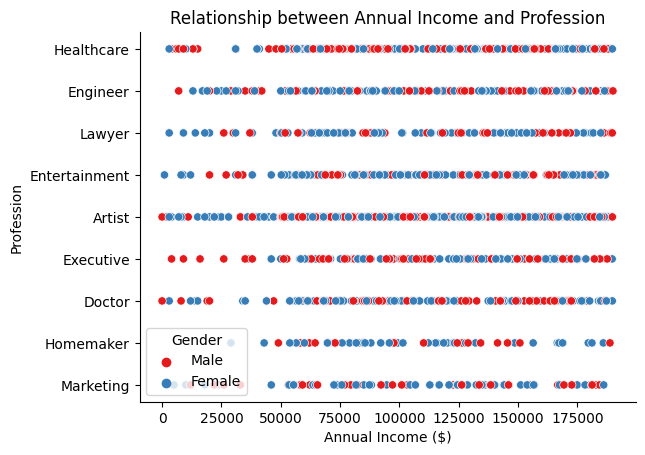

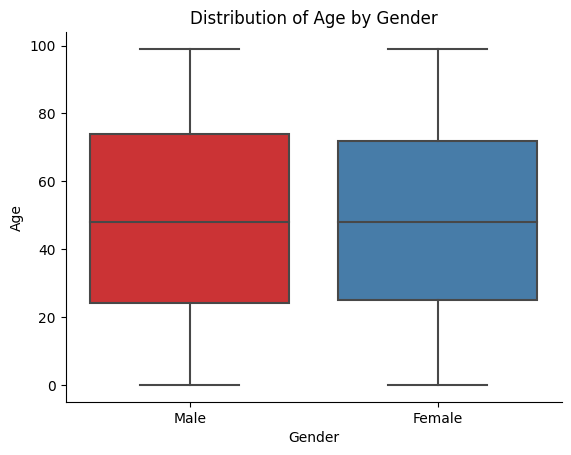

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

'''df1 = df.groupby('Gender')[['Annual Income ($)']]
df1.head()'''
#df1 = df.groupby('Gender')[['Work Experience']].mean()


sns.histplot(data=df, x='Annual Income ($)', kde=True)
sns.despine()
plt.xlabel('Annual Income ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Annual Income')
plt.show()

# Histogram of Spending Score
sns.histplot(data=df, x='Spending Score (1-100)', kde=True)
sns.despine()
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.title('Distribution of Spending Score')
plt.show()

# Histogram of Work Experience
sns.histplot(data=df, x='Work Experience', kde=True)
sns.despine()
plt.xlabel('Work Experience')
plt.ylabel('Frequency')
plt.title('Work Experience')
plt.show()

# Scatter plot of Annual Income and Spending Score
sns.scatterplot(data=df, x='Annual Income ($)', y='Spending Score (1-100)', hue='Gender', palette='Set1')
sns.despine()
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.title('Relationship between Annual Income and Spending Score by Gender')
plt.show()

# Scatter plot of Annual Income and Profession Score
sns.scatterplot(data=df, x='Annual Income ($)', y='Profession', hue='Gender', palette='Set1')
sns.despine()
plt.xlabel('Annual Income ($)')
plt.ylabel('Profession')
plt.title('Relationship between Annual Income and Profession')
plt.show()

# Boxplot of Age by Gender
sns.boxplot(data=df, x='Gender', y='Age', palette='Set1')
sns.despine()
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Distribution of Age by Gender')
plt.show()

In [7]:
'''df1 = df.groupby('Gender')[['Annual Income ($)']]
df1.head()'''
df1 = df.groupby('Gender')[['Annual Income ($)']].mean()
df1.head()

,Annual Income ($)
Gender,
Female,110553.715008
Male,110991.323096


In [8]:
#df1.iloc[:, 0]
print(df1.iloc[:, 0])


Gender
Female    110553.715008
Male      110991.323096
Name: Annual Income ($), dtype: float64


Check for total missing values from which row and column

In [9]:
count = 0
for col in df.columns:
    for row in df.index:
        if pd.isna(df.loc[row, col]):
            count+=1
            #print(f"Missing values found in column {col} and row {row+1}")
print(f"Total blanks are: {count}")
'''col to identify column name and row as per their number which is 0 indexed'''

Total blanks are: 35


'col to identify column name and row as per their number which is 0 indexed'

Check for any anomalies in data

In [10]:
count=0
for row in df.index:
    temp = df.loc[row, 'Age']
    if (temp < 5) | (temp > 150):
        #print(f"Index is {row+1}")
        count+=1
        print(f"The age value is: {df.loc[row, 'Age']}")
print(f"Total such outliers are {count}")

The age value is: 1
The age value is: 0
The age value is: 0
The age value is: 4
The age value is: 1
The age value is: 4
The age value is: 0
The age value is: 4
The age value is: 1
The age value is: 1
The age value is: 0
The age value is: 3
The age value is: 0
The age value is: 1
The age value is: 0
The age value is: 4
The age value is: 3
The age value is: 3
The age value is: 0
The age value is: 0
The age value is: 2
The age value is: 3
The age value is: 3
The age value is: 3
The age value is: 1
The age value is: 3
The age value is: 3
The age value is: 4
The age value is: 3
The age value is: 3
The age value is: 4
The age value is: 0
The age value is: 1
The age value is: 0
The age value is: 0
The age value is: 2
The age value is: 4
The age value is: 3
The age value is: 2
The age value is: 0
The age value is: 0
The age value is: 3
The age value is: 1
The age value is: 1
The age value is: 4
The age value is: 2
The age value is: 0
The age value is: 1
The age value is: 1
The age value is: 2


1) To understand whether there is a difference in spending scores between 'Male' and 'Female' customers

1.a> to check whether if there's a significant difference in the variance of two groups using levene test. If different, then we will use Welch's ttest

In [11]:
from scipy.stats import levene

#find if varinces are different

print(f"H0: There's no difference between variances of two groups")
print(f"H1: There's some difference between variances of two groups")
print()
male_data = df[df['Gender']=='Male']['Spending Score (1-100)']
female_data = df[df['Gender']=='Female']['Spending Score (1-100)']

'''
male_data = df.loc[df['Gender'] == 'Male', 'Spending Score (1-100)']
female_data = df.loc[df['Gender'] == 'Female', 'Spending Score (1-100)']
'''

statistic, p_value = levene(male_data, female_data)

print("Levene's test for equality of variances:")
print(f"Test statistic = {statistic:.2f}")
print(f"p-value = {p_value:.4f}")
print()

infer(p_value)

H0: There's no difference between variances of two groups
H1: There's some difference between variances of two groups

Levene's test for equality of variances:
Test statistic = 0.19
p-value = 0.6621

We reject the alternate hypothesis(H1) and accept the null hypothesis(H0)


1.b> Since there's no difference in the variances of two groups, we will use independent t test in this case

In [12]:
from scipy.stats import ttest_ind
male_data = df.loc[df['Gender'] == 'Male', 'Spending Score (1-100)']
female_data = df.loc[df['Gender'] == 'Female', 'Spending Score (1-100)']

print(f"H0: There's no difference between spending score of two groups")
print(f"H1: There's some difference between spending score of two groups")
print()

t_statistic, p_value = ttest_ind(male_data, female_data)

print("Independent samples t-test:")
print(f"t-statistic = {t_statistic:.2f}")
print(f"p-value = {p_value:.4f}")
print()

infer (p_value)

H0: There's no difference between spending score of two groups
H1: There's some difference between spending score of two groups

Independent samples t-test:
t-statistic = -0.02
p-value = 0.9812

We reject the alternate hypothesis(H1) and accept the null hypothesis(H0)


 2. To understand whether there is a difference in spending scores between customers from different professions "Engineer," "Doctor," and "Executive"

In [13]:
from scipy.stats import f_oneway
#Here 3 categories are there but the feature is only one. Hence, one way anova

print(f"H0: There's no difference between spending score of three groups")
print(f"H1: There's some difference between spending score of three groups")
print()

#engineer_spending = df.loc[df['Profession']=='Engineer', 'Spending Score (1-100)']
engineer_spending = df[df['Profession']=='Engineer'][['Spending Score (1-100)']]
doctor_spending = df[df['Profession']=='Doctor'][['Spending Score (1-100)']]
executive_spending = df[df['Profession']=='Executive'][['Spending Score (1-100)']]

f_stat, p_value = f_oneway(engineer_spending, doctor_spending, executive_spending)

print("1 way anova test:")
#print(f"t-statistic = {t_statistic:.2f}")
print(f"p-value = {p_value[0]:.4f}")
print()

infer(p_value[0])

H0: There's no difference between spending score of three groups
H1: There's some difference between spending score of three groups

1 way anova test:
p-value = 0.6143

We reject the alternate hypothesis(H1) and accept the null hypothesis(H0)


3. To understand whether there is a relationship between "Gender" and "Annual Income."

In [14]:
male_income = df[df['Gender'] == 'Male']['Annual Income ($)']
female_income = df[df['Gender'] == 'Female']['Annual Income ($)']

print(f"H0: There's no difference between spending score of three groups")
print(f"H1: There's some difference between spending score of three groups")
print()

t_stat, p_val = ttest_ind(male_income, female_income, equal_var=True)

print("T test with equal variance:")
print(f"p-value = {p_value[0]:.4f}")
print()

infer(p_value[0])

H0: There's no difference between spending score of three groups
H1: There's some difference between spending score of three groups

T test with equal variance:
p-value = 0.6143

We reject the alternate hypothesis(H1) and accept the null hypothesis(H0)


In [15]:
#Bins for income
income_bins = [0, 40000, 80000, np.inf]
income_labels = ['Low Income', 'Mid Income', 'High Income']

df['Income Group'] = pd.cut(df['Annual Income ($)'], bins=income_bins, labels=income_labels)

cross_tab = pd.crosstab(df['Gender'], df['Income Group'])
#cross_tab = pd.crosstab(df['Income Group'],df['Gender'] )

print(cross_tab)
print()
from scipy.stats import chi2_contingency

# perform chi-square test on the cross_tab variable
chi2, pval, dof, expected = chi2_contingency(cross_tab)

# print the results of the chi-square test
print('Chi-square statistic = {:.2f}'.format(chi2))
print('p-value = {:.4f}'.format(pval))
#print('Degrees of freedom = {}'.format(dof))
#print('Expected frequencies = \n{}'.format(expected))
print()
infer(p_val)



Income Group  Low Income  Mid Income  High Income
Gender                                           
Female                66         295          825
Male                  46         175          591

Chi-square statistic = 2.98
p-value = 0.2259

We reject the alternate hypothesis(H1) and accept the null hypothesis(H0)


4. Run a multiple regression model with 'Spending Score" as the dependent variable and other variables as predictors.   Explain your model

In [16]:

for i in df.columns:
    print(i, end=',')

CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Income Group,

In [17]:
for i in df.columns:
    print (i)

CustomerID
Gender
Age
Annual Income ($)
Spending Score (1-100)
Profession
Work Experience
Family Size
Income Group


In [18]:
df = df.copy()

In [19]:
import pandas as pd
from sklearn.linear_model import LinearRegression


df = pd.concat([df, pd.get_dummies(df['Profession'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['Gender'])], axis=1)
df.drop('Profession', axis=1, inplace=True)
df.drop('Gender', axis=1, inplace=True)


In [20]:
for i in df.columns:
    print(i)

CustomerID
Age
Annual Income ($)
Spending Score (1-100)
Work Experience
Family Size
Income Group
Artist
Doctor
Engineer
Entertainment
Executive
Healthcare
Homemaker
Lawyer
Marketing
Female
Male


In [21]:
df.drop('CustomerID', axis=1, inplace=True)
df.drop('Income Group', axis=1, inplace=True)

In [22]:
X = df.drop('Spending Score (1-100)', axis=1)
#X = df.loc[:, df.columns != 'Spending Score (1-100)']
y = df['Spending Score (1-100)']

In [23]:
X

,Age,Annual Income ($),Work Experience,Family Size,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Female,Male
0,19,15000,1,4,False,False,False,False,False,True,False,False,False,False,True
1,21,35000,3,3,False,False,True,False,False,False,False,False,False,False,True
2,20,86000,1,1,False,False,True,False,False,False,False,False,False,True,False
3,23,59000,0,2,False,False,False,False,False,False,False,True,False,True,False
4,31,38000,2,6,False,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,71,184387,8,7,True,False,False,False,False,False,False,False,False,True,False
1996,91,73158,7,7,False,True,False,False,False,False,False,False,False,True,False
1997,87,90961,9,2,False,False,False,False,False,True,False,False,False,False,True
1998,77,182109,7,2,False,False,False,False,True,False,False,False,False,False,True


In [24]:
y

0       39
1       81
2        6
3       77
4       40
        ..
1995    40
1996    32
1997    14
1998     4
1999    52
Name: Spending Score (1-100), Length: 2000, dtype: int64

In [25]:
# Perform linear regression
reg = LinearRegression().fit(X, y)

# Print the coefficients
print(reg.coef_)
print(reg.intercept_)

print()

print('Linear Regression Equation:')
equation = 'y = ' + ' + '.join(['{}*{}'.format(round(reg.coef_[i],2), col) for i, col in enumerate(X.columns)])
print(equation + ' + {}'.format(round(reg.intercept_,4)))

"""
equation = 'y = '
for i, col in enumerate(X.columns):
    coef = round(model.coef_[i], 2)
    term = '{}*{}'.format(coef, col)
    if i == 0:
        equation += term
    else:
        equation += ' + ' + term
equation += ' + {}'.format(round(model.intercept_, 2))
print(equation)
"""

[-4.25431922e-02  1.70350459e-05 -2.09695077e-01  5.49419362e-02
  8.18911672e+00  7.27851965e+00  4.64420995e+00  8.34673162e+00
  5.21395820e+00  5.85361771e+00  2.12093927e+00  4.13643391e+00
  4.12145472e+00 -1.25159768e-02  1.25159768e-02]
45.40709860925507

Linear Regression Equation:
y = -0.04*Age + 0.0*Annual Income ($) + -0.21*Work Experience + 0.05*Family Size + 8.19*Artist + 7.28*Doctor + 4.64*Engineer + 8.35*Entertainment + 5.21*Executive + 5.85*Healthcare + 2.12*Homemaker + 4.14*Lawyer + 4.12*Marketing + -0.01*Female + 0.01*Male + 45.4071


"\nequation = 'y = '\nfor i, col in enumerate(X.columns):\n    coef = round(model.coef_[i], 2)\n    term = '{}*{}'.format(coef, col)\n    if i == 0:\n        equation += term\n    else:\n        equation += ' + ' + term\nequation += ' + {}'.format(round(model.intercept_, 2))\nprint(equation)\n"

In [26]:
for i in df.columns:
    print(i)

Age
Annual Income ($)
Spending Score (1-100)
Work Experience
Family Size
Artist
Doctor
Engineer
Entertainment
Executive
Healthcare
Homemaker
Lawyer
Marketing
Female
Male
